# Work Sheet- 4 ( Project )


Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

## Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio',
          'KY': 'Kentucky', 
          'AS': 'American Samoa', 
          'NV': 'Nevada', 'WY': 'Wyoming',
          'NA': 'National', 'AL': 'Alabama',
          'MD': 'Maryland', 'AK': 'Alaska',
          'UT': 'Utah',
          'OR': 'Oregon', 
          'MT': 'Montana',
          'IL': 'Illinois',
          'TN': 'Tennessee',
          'DC': 'District of Columbia',
          'VT': 'Vermont',
          'ID': 'Idaho',
          'AR': 'Arkansas',
          'ME': 'Maine',
          'WA': 'Washington', 
          'HI': 'Hawaii',
          'WI': 'Wisconsin', 
          'MI': 'Michigan',
          'IN': 'Indiana',
          'NJ': 'New Jersey', 
          'AZ': 'Arizona', 
          'GU': 'Guam',
          'MS': 'Mississippi',
          'PR': 'Puerto Rico',
          'NC': 'North Carolina',
          'TX': 'Texas',
          'SD': 'South Dakota',
          'MP': 'Northern Mariana Islands',
          'IA': 'Iowa', 'MO': 'Missouri',
          'CT': 'Connecticut',
          'WV': 'West Virginia', 
          'SC': 'South Carolina',
          'LA': 'Louisiana',
          'KS': 'Kansas',
          'NY': 'New York',
          'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

    OBJ. 1>> Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'.

In [3]:
def get_list_of_university_towns():
    with open('university_towns.txt')as file:
        data = []
        for line in file:
            data.append(line[:-1])
    state_town = []
    for line in data:
        if line[-6: ]=='[edit]':
            state = line[:-6]
        elif '(' in line:
            town = line[:line.index('(')-1]
            state_town.append([state,town])
        else:
            town = line
            state_town.append([state,town])
        
    state_college_df = pd.DataFrame(state_town, columns=['State','RegionName'])
    return state_college_df
get_list_of_university_towns().head()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


OBJ.2 >>  Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3 ?

In [4]:
def get_recession_start():
    x = pd.ExcelFile('gdplev.xls')
    gdp = x.parse(skiprows=7)
    gdp = gdp[['Unnamed: 4', 'Unnamed: 5']]
    gdp = gdp.loc[212:]
    gdp.columns = ['Quarter','GDP']
    gdp['GDP'] = pd.to_numeric(gdp['GDP'])
    quarters_begining = []
#print(gdp.iloc[0][1])
    for i in range(len(gdp)-2):
        if(gdp.iloc[i][1]>gdp.iloc[i+1][1]) & (gdp.iloc[i+1][1]>gdp.iloc[i+2][1]):
            quarters_begining.append(gdp.iloc[i][0])
    return quarters_begining[0]
get_recession_start()

'2008q3'

OBJ. 3 >> Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3 ?

In [5]:
def get_recession_end():
    x1 = pd.ExcelFile('gdplev.xls')
    gdp3 = x1.parse(skiprows=219)
    gdp3 = gdp3[['1999q4',9926.1]]
    gdp3.columns = ['Quarter','GDP']
    start = get_recession_start()
    start_index = gdp3[gdp3['Quarter'] == start].index.tolist()[0]
    gdp3 = gdp3.iloc[start_index: ]
    quarter_end = []
    for j in range(len(gdp3)-2):
        if(gdp3.iloc[j][1]<gdp3.iloc[j+1][1]) & (gdp3.iloc[j+1][1]<gdp3.iloc[j+2][1]):
            quarter_end.append(gdp3.iloc[j][0])
    return quarter_end[2]
get_recession_end()

'2009q4'

OBJ. 4 >> Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3 ?

In [6]:
def get_recession_bottom():
    x2 = pd.ExcelFile('gdplev.xls')
    gdp4 = x2.parse(skiprows=219)
    gdp4 = gdp4[['1999q4',9926.1]]
    gdp4.columns = ['Quarter','GDP']
    start = get_recession_start()
    start_index = gdp4[gdp4['Quarter'] == start].index.tolist()[0]
    end = get_recession_end()
    end_index = gdp4[gdp4['Quarter'] == end].index.tolist()[0]
    gdp4 = gdp4[start_index:end_index+1]
    bottom = gdp4['GDP'].min()
    bottom_index = gdp4[gdp4['GDP'] == bottom].index.tolist()[0]
    gdp4.loc[bottom_index]['Quarter']
    
    return gdp4.loc[bottom_index]['Quarter']
get_recession_bottom()

'2009q2'

OBJ. 5 >> Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows. ?

In [7]:
def new_col_names():
    years = list(range(2000,2017))
    quars = ['q1','q2','q3','q4']
    quar_year=[]
    for y in years:
        for u in quars:
            quar_year.append(str(y)+u)
    return quar_year[:67]
def convert_housing_data_to_quarters():
    data = pd.read_csv('City_Zhvi_AllHomes.csv')
    data.drop(['RegionID','Metro','CountyName','SizeRank'],axis=1,inplace=True)
    data['State'] = data['State'].map(states)
    data.set_index(['State','RegionName'],inplace=True)
    col = list(data.columns)
    data.drop(col[:45],axis = 1,inplace = True)
    #qs is quarter of the year
    qs = [list(data.columns)[a:a+3] for a in range(0,len(list(data.columns)),3)]
    column_names=new_col_names()

    for col,q in zip(column_names,qs):
        data[col] = data[q].mean(axis = 1)
    data = data[column_names]
    return data
convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


OBJ. 6 >> First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss). ?

In [8]:
uni_towns = get_list_of_university_towns()
bottom = get_recession_bottom() #recession bottom
start = get_recession_start()  #recession start
hdata = convert_housing_data_to_quarters()  #Converts housing data to quarters and returns it as mean values in a dataframe
bstart = hdata.columns[hdata.columns.get_loc(start) -1]
hdata['ratio'] = hdata[bottom] - hdata[bstart]
hdata = hdata[[bottom,bstart,'ratio']]
hdata.head()

,,2009q2,2008q2,ratio
State,RegionName,,,
New York,New York,465833.333333,503933.333333,-38100.000000
California,Los Angeles,413900.000000,502266.666667,-88366.666667
Illinois,Chicago,219700.000000,237900.000000,-18200.000000
Pennsylvania,Philadelphia,116166.666667,118133.333333,-1966.666667
Arizona,Phoenix,168233.333333,205266.666667,-37033.333333


In [9]:
hdata = hdata.reset_index()
unitown_data = pd.merge(hdata,uni_towns,how='inner',on = ['State','RegionName'])
unitown_data.head()

,State,RegionName,2009q2,2008q2,ratio
0,Nevada,Las Vegas,164333.333333,232300.000000,-67966.666667
1,California,San Diego,389500.000000,441400.000000,-51900.000000
2,Texas,Dallas,105100.000000,115366.666667,-10266.666667
3,Texas,Austin,204000.000000,213733.333333,-9733.333333
4,Ohio,Columbus,109766.666667,113500.000000,-3733.333333


In [10]:
unitown_data['uni'] = True
unitown_data.head()

,State,RegionName,2009q2,2008q2,ratio,uni
0,Nevada,Las Vegas,164333.333333,232300.000000,-67966.666667,True
1,California,San Diego,389500.000000,441400.000000,-51900.000000,True
2,Texas,Dallas,105100.000000,115366.666667,-10266.666667,True
3,Texas,Austin,204000.000000,213733.333333,-9733.333333,True
4,Ohio,Columbus,109766.666667,113500.000000,-3733.333333,True


In [11]:
hdata2 = pd.merge(hdata,unitown_data,how = 'outer',on = ['State','RegionName',bottom,bstart,'ratio'])
hdata2['uni'] = hdata2['uni'].fillna(False)
hdata2.dropna()
hdata2.head()

,State,RegionName,2009q2,2008q2,ratio,uni
0,New York,New York,465833.333333,503933.333333,-38100.000000,False
1,California,Los Angeles,413900.000000,502266.666667,-88366.666667,False
2,Illinois,Chicago,219700.000000,237900.000000,-18200.000000,False
3,Pennsylvania,Philadelphia,116166.666667,118133.333333,-1966.666667,False
4,Arizona,Phoenix,168233.333333,205266.666667,-37033.333333,False


In [12]:
uni_town = hdata2[hdata2['uni'] == True]
non_uni_town = hdata2[hdata2['uni'] == False]

In [13]:
import re
from scipy.stats import ttest_ind

In [14]:
t,p = ttest_ind(uni_town['ratio'].dropna(),non_uni_town['ratio'].dropna())
p

0.0020996596579520525

In [15]:
difference = True if p<0.01 else False
better = "Non-University Town" if uni_town['ratio'].mean()<non_uni_town['ratio'].mean() else "University Town"
print(difference)
print(p)
print(better)

True
0.00209965965795
University Town


# Visualization

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

<IPython.core.display.Javascript object>


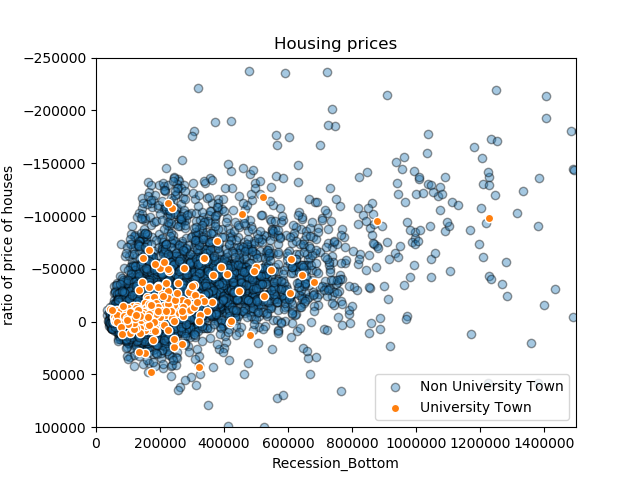

In [17]:
plt.figure()
plt.scatter(non_uni_town['2009q2'],non_uni_town['ratio'],edgecolor = 'black', alpha = 0.4,label = 'Non University Town')
plt.scatter(uni_town['2009q2'],uni_town['ratio'],edgecolor = 'white',label = 'University Town')

In [18]:
plt.xlim([0,1500000])
plt.ylim([100000,-250000])
plt.xlabel('Recession_Bottom')
plt.ylabel('ratio of price of houses ')
plt.title('Housing prices')
plt.subplots_adjust(left=0.15)

In [19]:
plt.legend()
#plt.legend(loc=0, frameon=False)